### **Trabajo Practico N°1**

In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

**Ejercicio 1:**

Implementamos la funcion descompLU que dada una matriz A(nxn), busca la descomposicion LU(A = LU).   
Inicia creando dos matrices (L y U) como matrices de ceros con las mismas dimensiones que la matriz de entrada.   
Luego verifica si el elemento A[0,0] es diferente a cero.Si es cero se retorna una matriz identidad y la matriz original A , ya que la descomposición LU no es posible en este caso (esto evita divisiones por cero).  
En el caso de que no sea igual a cero procede a calcular las matrices L y U recursivamente.    
Empezando por el caso base, que la matriz sea de 2x2, en el que calcula directamente los elementos de L y U segun las formulas de la descompusicion LU para matrices de 2x2.   
Si el tamaño de la matriz es mayor a 2x2 , calcula la primera columna de L (siendo la primera columna de A dividida por A[0,0]) y la primer fila de U (siendo igual a la primera fila de A).   
Luego, se calcula la submatriz U restante (siendo el parametro de entrada (A22 - L21*U12), donde A22 una matriz (n-1)x(n-1) y  L21, U12 vectores)y se realiza una llamada recursiva a la función descompLU para calcular la descomposición LU de la submatriz reducida. Esto se hace hasta que se complete la factorización de toda la matriz A.

In [ ]:
def descompLU(a):
    n = len(a)
    nlin, ncol = a.shape
    L = np.zeros((nlin, ncol))
    U = np.zeros((nlin, ncol))
    if (a[0, 0] != 0): # pedimos que sea distinto de 0 para no tener una division por 0
       if (nlin == 2): # caso base (matriz 2x2)
            L[0, 0] = 1.0
            L[1, 0] = a[1, 0] / a[0, 0]
            U[0, 0] = a[0, 0]
            U[0, 1] = a[0, 1]
            U[1, 1] = a[1, 1] - np.dot(L[1, 0], U[0, 1])
       else:
          L[1:, 0] = a[1:, 0] / a[0, 0]
          # la primer columna de L sin L00 es = a la primer columna de a (sin a00)/a00
          U[0, :] = a[0, :]
          # primera fila de u es primera fila de a
          U[1:, 1:] = a[1:, 1:] - np.outer(L[1:, 0], U[0, 1:])
          # submatriz de u = cuenta dada en el tp
          L1, U1 = descompLU(a[1:, 1:] - np.outer(L[1:, 0], U[0, 1:]))
          # recursion
          L[1:, 1:], U[1:, 1:] = L1, U1
       np.fill_diagonal(L, 1)
    else:
       print("Error, Se encontró un 0 en la diagonal")
       return [np.identity(n), a]

    return [L, U]

**Ejercicio 3:**

Implementamos esta funcion que resuelve un sistema de ecuaciones lineales dividiendolo en dos partes.   
Primero resuelve Ly = b y luego con el resultado obtenido calcula Ux = y. Siendo las matrices L, U las encontradas en la funcion anterior(descompLU). Para llevar a cabo estas ecuaciones utilizamos la funcion de numpy scipy.linalg.solve_triangular.

In [ ]:
def resolverLU (a, b)-> list[float]:
  L, U = descompLU(a)
  # Buscamos L y U apartir de la funcion descompLU
  Y = scipy.linalg.solve_triangular(L, b, lower = True)
  X = scipy.linalg.solve_triangular(U, Y, lower = False)
  #resolvemos sistemas de ecuaciones lineales
  return X

**Ejercicio 4:**

Implementamos esta funcion que tomando una matriz y un vector de numeros aleatorios entre [−1, 1) calcula el error relativo de norma 2. Sabiendo que: error = ∥Ax−b∥2/∥b∥2. Siendo x la calculada utilizando la funcion previamente implementada(resolverLU).   
Mas adelante nos dimos cuenta que necesitabamos esta misma funcion pero dandole nosotras los parametros de entrada por lo tanto para evitar repetir codigo, cambiamos la funcion. Si no le entra ningun parametro de entrada busca matriz y vector random, y si le entra utiliza las dadas.

In [ ]:
def errorRelativo (A = None, X = None, B = None):
  if (A is None) and (B is None) and (X is None):
     A = np.random.uniform(-1, 1, size=(10, 10)) # generamos matriz aleatoria
     B = np.random.uniform(-1, 1, size=10) # generamos vector aleatoria
     X = resolverLU(A, B)
  divisor = np.linalg.norm((A @ X)-B,2)
  # divisor = ∥Ax−b∥2
  dividendo = np.linalg.norm(B,2)
  # dividendo = ∥b∥2
  if dividendo == 0: #para evitar divisiones por 0
    error = 0
  else:
    error = divisor/dividendo
  return error

**Ejercicio 5:**

Implementamos esta funcion que dada una matriz(asumiendo que es inversible) nos devuelve su inversa realizando lo siguiente:  
Definimos a la matriz Inv como una matriz vacia a la cual luego le agregara como filas los resultados de resolver los sistemas Ly = ei y Ux = y utilizando la funcion descompLU.   
Realiza esto para cada vector ei, 1 <= i <= n, de la base canonica de R^n.  
Una vez agregados todo los resultados hicimos la transpuesta de la inversa ya que los resultados debian estar guardados como columnas.

In [ ]:
def inversa (a):
  nlin, ncol = a.shape
  Inv = []
  e = np.zeros((nlin,1))
  L, U = descompLU(a)
  for i in range(nlin):
      e[i] = 1 #armamos los vectores de la base canonica
      Y = scipy.linalg.solve_triangular(L, e, lower = True)
      X = scipy.linalg.solve_triangular(U, Y, lower = False)
      # resolvemos sistemas de ecuaciones lineales
      Inv.append(X)
      e[i] = 0
  Inv = np.squeeze(Inv).T #para guardarlo como columnas
  return Inv

**Ejercicio 6:**

Implementamos la funcion que calcula el error en frobenius tomando una matriz de numeros aleatorios entre [-1,1).  
Para calcular ∥A^(−1)A − I∥F llamamos a la funcion inversa(implementada anteriormente) y a la funcion de numpy np.linalg.norm que calcula la norma de frobenius.

In [ ]:
def frobenius ():
    A = np.random.uniform(-1, 1, size=(10, 10))
    I = np.identity(10)
    inversaA = inversa(A)
    normafrobenius = np.linalg.norm(inversaA @ A - I, ord="fro")
    #∥A^(−1)A − I∥F
    return normafrobenius

**Ejercicio 7:**

El experimento se realiza 10 veces para cada tamaño de matriz, y en cada repetición, se generan matrices aleatorias y vectores aleatorios x. Luego, se calcula el vector b como el producto de esas matrices y x.  
El experimento se basaba en dos metodos(para cada repeticion y tamaño de la matriz):

*   Calculamos la solucion x1 del sistema Ax=b utilizando nuestra funcion resolverLU.
*   Calculamos la solucion x2 del sistema Ax=b mediante la formula x2= A^(-1)b utilizando nuestra funcion inversa.

En ambos metodos se calculan los logaritmos naturales de los errores relativos con las soluciones halladas. Luego, se suman en los vectores v1 y v2, respectivamente, para cada tamaño de matriz.

Finalmente, se traza un gráfico que muestra cómo varían los errores relativos a medida que aumenta el tamaño de la matriz. Se comparan los errores relativos de los dos métodos.

In [ ]:
def experimento7():
  v1 = np.zeros((200))
  v2 = np.zeros((200))
  for j in range(10, 200):
    i = 0
    while i < 10:
     matrizaleatoria = np.random.uniform(-1, 1, size =(j, j)) # generamos matriz aleatoria
     x = np.random.uniform(-1, 1, size = j ) # generamos vector aleatorio
     b = matrizaleatoria @ x #definimos b = A * x

     x1 = resolverLU(matrizaleatoria, b) #buscamos las soluciones
     error1 = errorRelativo(matrizaleatoria, x1, b) # sacamos el error relativo
     v1[j] += np.log(error1) #armamos los vectores con la suma de los ln de los errores

     a = inversa(matrizaleatoria)
     x2 = a @ b # buscamos las soluciones
     error2 = errorRelativo(matrizaleatoria, x2, b) # sacamos el error relativo
     v2[j] += np.log(error2) #armamos los vectores con la suma de los ln de los errores

     i+=1

  n = np.arange(10, len(v1))
  plt.plot(n, v2[10:], label= "x = Inversa(A) ∗b")
  plt.plot(n, v1[10:], label=  "Resolver(LU) x=b")
  plt.title("Errores relativos ||Ax−b||/||b||")
  plt.legend()
  plt.xlabel("Tamaño matriz")
  plt.ylabel("Valores de error relativo")
  plt.show()

**Grafico:**

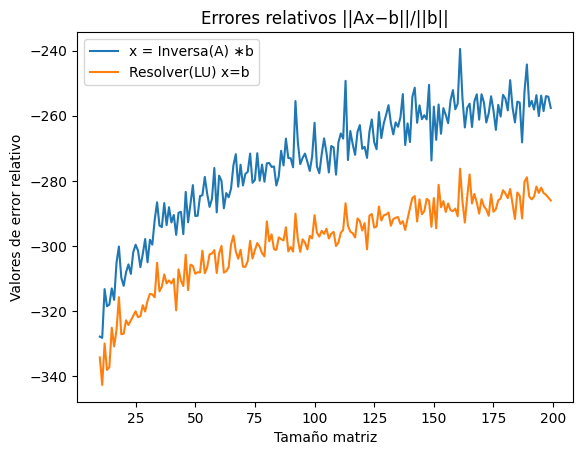

In [ ]:
experimento7()

**¿Que conclusion pueden obtener del grafico?**    

Pudimos notar que cuando el tamaño de la matriz es mas chica, ambas curvas comienzan con valores de error relativo más bajos, lo que deducimos es que el error relativo es más significativo para matrices grandes.
Con lo que a medida que la matriz crece, los dos métodos de solución se vuelven menos precisos en términos de error relativo. Pensamos que esto sucede ya que al hacer cada vez mas cuentas puede generar problemas de precisión numérica, es decir que se puede ir acumulando mas error.

Entendimos que la curva "Resolver(LU) x = b" tiene un error relativo más bajo en comparación con "x = Inversa(A) * b". Esto nos dice que el método "Resolver(LU)" es más preciso en este experimento.

Algo a tener en cuenta es que en el cálculo de la inversa se realizan muchas operaciones llamando a otras funciones lo que hace que el error sea mas alto.

**Ejercicio 8:**

En este ejercicio repetimos todo el experimento del ejercicio 7 midiendo los errores relativos entre las soluciones halladas y la solucion original(∥xi−x∥2/
∥x∥2).  
Este nuevo experimento busca comparar el comportamiento de los errores relativos entre las soluciones encontradas y el vector original x en lugar de compararlos con el vector b. Esto evalua si los dos métodos utilizados tienen un comportamiento similar o diferente cuando se comparan con el vector original x.

In [ ]:
def experimento8():
  v1 = np.zeros((200,1))
  v2 = np.zeros((200,1))
  for j in range(10, 200):
    i = 0
    while i < 10:
     matrizaleatoria = np.random.uniform(-1, 1, size =(j, j))
     A = np.identity(j)
     x = np.random.uniform(-1, 1, size = j )
     b = matrizaleatoria @ x

     x1 = resolverLU(matrizaleatoria, b)
     error1 = np.log(errorRelativo(A, x1, x)) # ingresamos la identidad para hacer xi−x
     v1[j] += error1

     a = inversa(matrizaleatoria)
     x2 = a @ b
     error2 = np.log(errorRelativo(A, x2, x)) # ingresamos la identidad para hacer xi−x
     v2[j] += error2

     i+=1

  n = np.arange(10, len(v1))
  plt.plot(n, v1[10:], label= "A x=b")
  plt.plot(n, v2[10:], label=  "x = Inversa(A) ∗b")
  plt.title("Errores relativos ||xi−x||/||x||")
  plt.legend()
  plt.xlabel("Tamaño matriz")
  plt.ylabel("Valores de error relativo")
  plt.show()

**Grafico:**

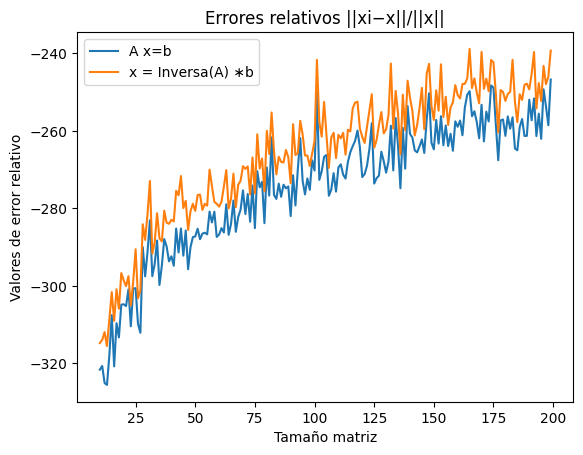

In [ ]:
experimento8()

**¿Observan el mismo comportamiento?**    

A diferencia del experimento anterior, en este caso estamos calculando el error relativo para saber la diferencia entre xi y x (donde xi es la solución encontrada por el método y x es la original).

En este gráfico, notamos lo mismo previamente mencionado, que los errores relativos aumentan a medida que las matrices se vuelven más grandes, lo que nos dice que empeora  la precisión numérica.

La diferencia en la separación entre las curvas en el grafico del ejercicio 7 y este se debe a la forma en que se mide y calcula el error relativo. En un caso, es en relación con el vector b y en el otro, en relación con el vector original x. Esto puede llevar a diferencias en los resultados y los graficos.


**Ejercicio 9:**

En este ejercicio teniamos que repetir todo el experimento del punto 7 y 8 utilizando los comando np.linalg.solve y np.linalg.inv en lugar de nuestras funciones resolverLU e inversa.

In [ ]:
def experimento9():
  v1 = np.zeros((200))
  v2 = np.zeros((200))
  v3 = np.zeros((200))
  v4 = np.zeros((200))
  for j in range(10,200):
   i = 0
   while i < 10:
     matrizaleatoria = np.random.uniform(-1, 1, size=(j, j))
     I = np.identity(j)
     x = np.random.uniform(-1, 1, size = j )
     b = matrizaleatoria @ x

     x1 = np.linalg.solve(matrizaleatoria, b) # utilizamos la funcion de numpy(sistema de ecuaciones lineales)
     error1 = np.log(errorRelativo(matrizaleatoria, x1, b))
     error3 = np.log(errorRelativo(I, x1, x))
     v1[j] += error1
     v3[j] += error3

     a = np.linalg.inv(matrizaleatoria) # utilizamos la funcion de numpy(inversa de una matriz)
     x2 = a @ b
     error2 = np.log(errorRelativo(matrizaleatoria, x2, b))
     error4 = np.log(errorRelativo(I, x2, x))
     v2[j] += error2
     v4[j] += error4

     i += 1

  n = np.arange(10, len(v1))
  plt.plot(n, v1[10:], label= "A x=b")
  plt.plot(n, v2[10:], label=  "x = Inversa(A) ∗b")
  plt.title("Errores relativos ||Ax−b||/||b|| con funciones de numpy")
  plt.legend()
  plt.xlabel("Tamaño matriz")
  plt.ylabel("Valores de error relativo")
  plt.show()

  n = np.arange(10, len(v3))
  plt.plot(n, v3[10:], label= "A x=b")
  plt.plot(n, v4[10:], label=  "x = Inversa(A) ∗b")
  plt.title("Errores relativos ||xi−x||/||x|| con funciones de numpy")
  plt.legend()
  plt.xlabel("Tamaño matriz")
  plt.ylabel("Valores de error relativo")
  plt.show()

**Graficos:**

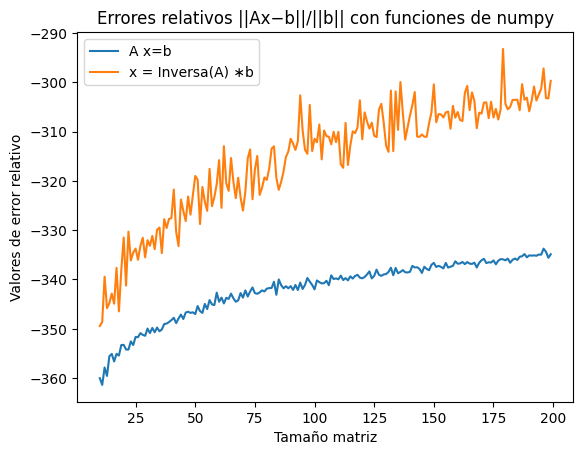

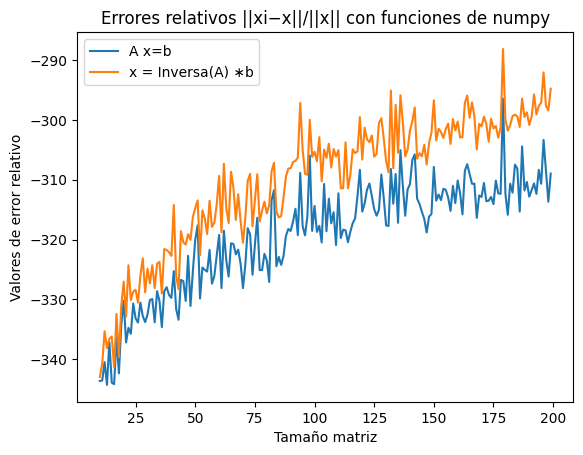

In [ ]:
experimento9()

Lo primero que pudimos notar es que al usar las funciones de numpy el experimento es mas eficaz.

Sabemos que lo bueno de usar las funciones de numpy es que tenemos la seguridad de que no tiene errores como puede llegar a tener las implementadas por nosotras. Con lo cual si queremos elegir un metodo para encontrar un error minimo es preferible hacer Ax = b con la funcion de numpy "np.linalg.solve". Si bien buscar la inversa es una forma de calcular lo mismo, no es recomendable. Nosotras analizamos que la inversa de numpy "np.linalg.inv" es mas eficiente que la inversa implementada por nosotras pero de todas maneras sigue siendo el metodo que lleva a errores mas altos.

Una observacion que tuvimos fue el cambio de escala del error relativo, en este ejercicio arranca con errores de menor valor a diferencia de los otros graficos.

**Ejercicio 10:**

En este ejercicio, repetimos el experimento del ejercicio 7 para n= 2,...,20 utilizando unicamente la matriz Hilbert

In [ ]:
def experimento10():
  v1 = np.zeros((20))
  v2 = np.zeros((20))
  condH = np.zeros((20))
  for j in range(2, 20):
    H = scipy.linalg.hilbert(j) #generamos matriz Hilbert
    condH[j] = np.linalg.cond(H) #calculamos numero de condicion y editamos el vector condH
    i = 0
    while i < 10:
       x = np.random.uniform(-1, 1, size = j )
       b = H @ x

       x1 = resolverLU(H, b)
       error1 = np.log(errorRelativo(H, x1, b))
       v1[j] += error1

       a = inversa(H)
       x2 = a @ b
       error2 = np.log(errorRelativo(H, x2, b))
       v2[j] += error2

       i += 1


  n = np.arange(2, len(v1))
  plt.plot(n, v1[2:], label= "Resolver(LU) x=b")
  plt.plot(n, v2[2:], label=  "x = Inversa(H) ∗b")
  plt.title("Errores relativos ||Hx−b||/||b|| con matriz Hilbert")
  plt.legend()
  plt.xlabel("Tamaño matriz")
  plt.ylabel("Valores de error relativo")
  plt.show()

  n = np.arange(2, len(condH))
  plt.plot(n, condH[2:], label= "Numero condicional de H")
  plt.title("Numero de condicion en funcion de la dimension de la matriz")
  plt.legend()
  plt.xlabel("Tamaño matriz")
  plt.ylabel("Numero de condicion")
  plt.show()

**Grafico:**

<ipython-input-26-73d4a28daf61>:14: RuntimeWarning: divide by zero encountered in log
  error1 = np.log(errorRelativo(H, x1, b))
<ipython-input-26-73d4a28daf61>:19: RuntimeWarning: divide by zero encountered in log
  error2 = np.log(errorRelativo(H, x2, b))


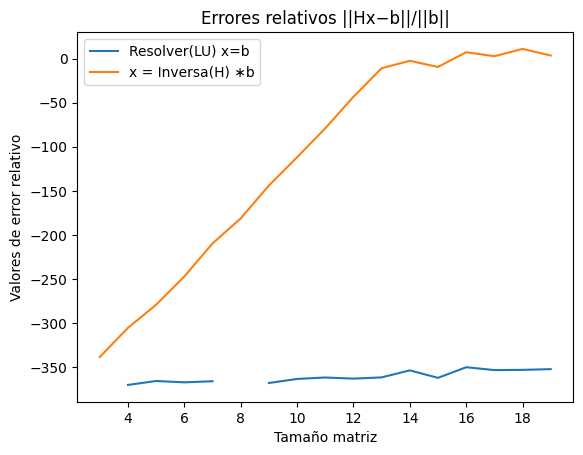

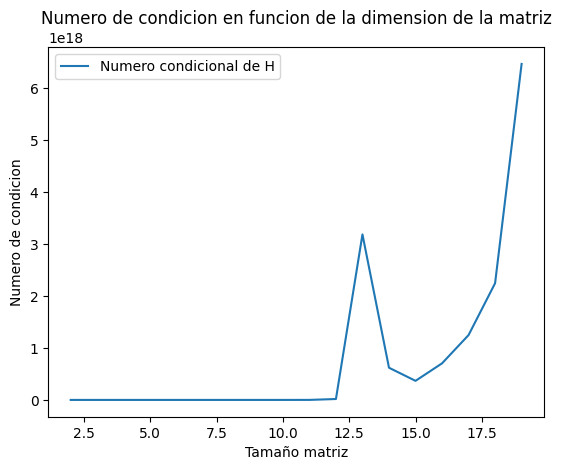

In [ ]:
experimento10()

Como vimos en los anteriores ejercicios, el metodo con mas error es el de la inversa. Podemos ver que con matrices de menor tamaño el error utilizando el metodo resolverLU es pequeño y bastante "lineal".    
Quisimos realizar un experimento propio para terminar de entender los graficos, en el cual en vez de darle la matriz Hilbert le damos matrices aleatorias como ya hicimos en experimentos anteriores. Al hacer esto observamos que hay una diferencia abismal(las curvas, con matrices random, tienen mas "picos"). Concluimos que se debe a el hecho de que en cada iteracion se modifican las matrices. En este caso no ocurre ya que la matriz es fija (Hilbert) para cada tamaño.

Una observacion es que a la hora de correr el codigo nos devuelve dos errores que son "divide by zero encountered in log" y que la curva resolverLU a veces sale "cortada". Creemos que esto pasa porque al calcular el error relativo, algunos valores le dan muy cerca de 0 y al hacer ln(0) nos devuelve directo infinito.

La curva del numero de condición aumenta significativamente a medida que la matriz es mas grande, lo que nos dice que las matrices de Hilbert se vuelven mal condicionadas a medida que crecen en tamaño.
Un numero de condición alto en una matriz puede llegar a ser problemático en aplicaciones practicas.
Por lo tanto, conocer el número de condición de una matriz es importante para evaluar la precisión de los cálculos numéricos que involucran esa matriz.  

En conclusion los gráficos muestran cómo el número de condición de la matriz de Hilbert aumenta con el tamaño de la matriz, lo que indica que estas matrices son propensas a ser mal condicionadas en dimensiones más altas. Además, los errores relativos también aumentan con el tamaño de la matriz, lo que destaca la importancia de la estabilidad numérica al resolver sistemas de ecuaciones lineales con matrices mal condicionadas como las de Hilbert.

### **CONCLUSIONES FINALES:**

Para finalizar, lo que podemos decir es que nos parecio un trabajo interesante y desafiante.   
La parte en la que mas pudimos extraer nuevos conocimientos fue en los experimentos, nos parecio muy interesante ver como funcionan los errores y matrices tan grandes. Como fue una de las primeras veces que realizabamos y analizabamos graficos, nos parecio un desafio. A partir de ahora sabemos que nos conviene usar las funciones de numpy para mas rapidez y menos errores numericos.

Tambien aprendimos que cuando se utilizan matrices de mayor tamaño, es común encontrar que el número de condición de estas matrices aumenta. Esto significa que las matrices más grandes tienden a ser mal condicionadas, lo que las hace más propensas a errores numéricos. Esto sucede, mas que nada, con las matrices de Hilbert ya que son conocidas por ser mal condicionadas, especialmente a medida que aumenta su tamaño.   
Como la descomposición LU es una técnica utilizada para resolver sistemas de ecuaciones lineales, cuando se aplican matrices mal condicionadas, los errores numéricos pueden amplificarse, lo que resulta en soluciones menos precisas.   
Los errores relativos son una medida que evalúa la precisión de las soluciones numéricas en comparación con los valores verdaderos. A medida que el número de condición de la matriz aumenta, es más probable que los errores relativos aumenten.

En conclusion, a medida que el tamaño de las matrices aumenta, el número de condición tiende a aumentar, lo que a su vez puede afectar negativamente la precisión de los cálculos numéricos, especialmente cuando se utiliza la descomposición LU para resolver sistemas de ecuaciones lineales. Esto resalta la importancia de considerar el número de condición y los errores relativos al trabajar con matrices de gran tamaño en aplicaciones numéricas, ya que estos factores pueden influir significativamente en la calidad de los resultados obtenidos.